<a href="https://colab.research.google.com/github/RaghavendraSreenivasa/Data-Analytics-projects/blob/main/Social_media_and_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This project explores the impact of social media usage on mental health through data and research. I created a survey to gather insights directly from users, focusing on their social media habits and how they perceive its effect on their mental well-being. A total of 50 responses were collected. While the sample size is relatively small, the goal of this project is to deepen my understanding of data analytics from collecting and cleaning data to analyzing trends and drawing insights. This hands-on approach allows me to apply analytical techniques in a meaningful context and build foundational skills in data-driven research.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_social_media_data.csv")

In [3]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-3-b5ebf749f727>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [4]:
time_col = "How many hours per day do you spend on social media?"
anxiety_col = "How often do you feel anxious after using social media?"
confidence_col = "Do you feel more or less confident about yourself after using social media?"

In [6]:
anxiety_ct = pd.crosstab(df[time_col], df[anxiety_col], normalize='index') * 100
print("\n Anxiety levels by hours spent:")
print(anxiety_ct.round(2))


 Anxiety levels by hours spent:
How often do you feel anxious after using social media?  Always  Never  Often  \
How many hours per day do you spend on social m...                              
0.5                                                        0.00  25.00   0.00   
2.0                                                       10.53   0.00  10.53   
4.0                                                       13.33   0.00  33.33   
6.0                                                        0.00  14.29  28.57   

How often do you feel anxious after using social media?  Rarely  Sometimes  
How many hours per day do you spend on social m...                          
0.5                                                       37.50      37.50  
2.0                                                       31.58      47.37  
4.0                                                        0.00      53.33  
6.0                                                       28.57      28.57  


In [7]:
confidence_ct = pd.crosstab(df[time_col], df[confidence_col], normalize='index') * 100
print("\n Confidence changes by hours spent:")
print(confidence_ct.round(2))


 Confidence changes by hours spent:
Do you feel more or less confident about yourself after using social media?  Much less confident  \
How many hours per day do you spend on social m...                                                 
0.5                                                                                         0.00   
2.0                                                                                         0.00   
4.0                                                                                        13.33   
6.0                                                                                         0.00   

Do you feel more or less confident about yourself after using social media?  Much more confident  \
How many hours per day do you spend on social m...                                                 
0.5                                                                                        12.50   
2.0                                                           

<Figure size 1200x600 with 0 Axes>

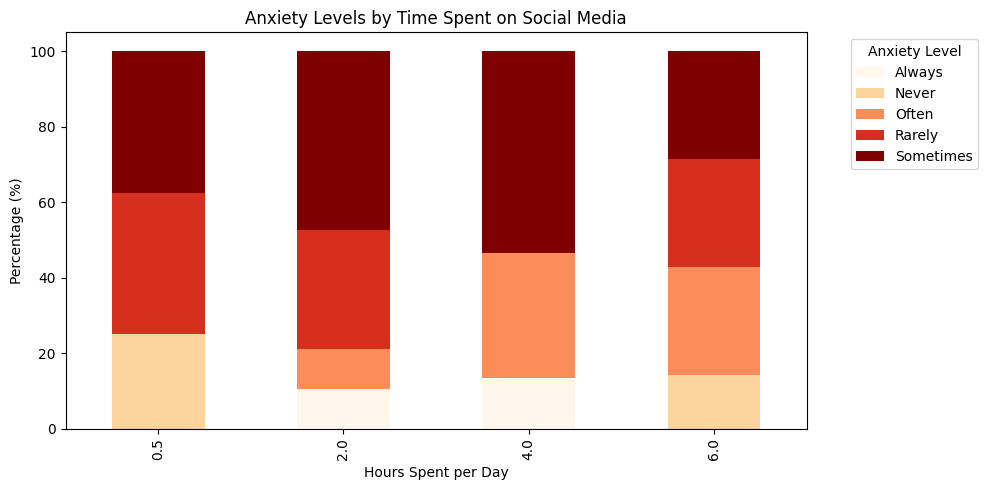

In [53]:
plt.figure(figsize=(12, 6))
anxiety_ct.plot(kind='bar', stacked=True, colormap='OrRd', figsize=(10, 5))
plt.title("Anxiety Levels by Time Spent on Social Media")
plt.ylabel("Percentage (%)")
plt.xlabel("Hours Spent per Day")
plt.legend(title="Anxiety Level", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

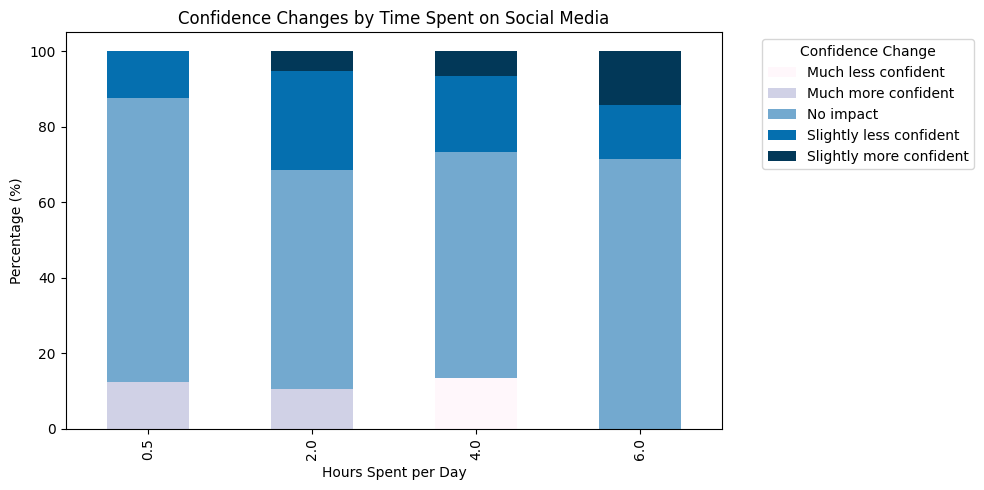

In [54]:
plt.figure(figsize=(12, 6))
confidence_ct.plot(kind='bar', stacked=True, colormap='PuBu', figsize=(10, 5))
plt.title("Confidence Changes by Time Spent on Social Media")
plt.ylabel("Percentage (%)")
plt.xlabel("Hours Spent per Day")
plt.legend(title="Confidence Change", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Conclusion**

People who spend more time on social media are more likely to feel anxious and slightly less confident. Most users who use it for 3–4+ hours a day often feel anxious afterward. While many say social media doesn't change their confidence, longer use is linked to feeling less confident.

Overall, using social media for a long time may have a negative effect on how people feel about themselves.

**Emotional Impact Based on Engagement Type**

This analysis explores whether people who actively engage on social media (like posting or commenting) experience different emotional effects compared to those who use it passively (just scrolling or watching content). The focus is on how often users feel anxious, how their confidence is affected, and how they feel overall after using social media.

In [13]:
df = df.rename(columns={
    'What type of engagement do you have on social media?': 'engagement_type',
    'How often do you feel anxious after using social media?': 'anxiety_level',
    'Do you feel more or less confident about yourself after using social media?': 'confidence_change',
    'After using social media, how do you feel overall?': 'overall_feeling'
})

In [14]:
df['engagement_type'] = df['engagement_type'].str.extract(r'(Active|Passive)', expand=False)

In [15]:
print(df['engagement_type'].value_counts())
print(df[['anxiety_level', 'confidence_change', 'overall_feeling']].nunique())

engagement_type
Passive    45
Active      4
Name: count, dtype: int64
anxiety_level        5
confidence_change    5
overall_feeling      4
dtype: int64


In [56]:
emotional_cols = {
    'anxiety_level': 'Anxiety Level',
    'confidence_change': 'Confidence Change',
    'overall_feeling': 'Overall Feeling'
}

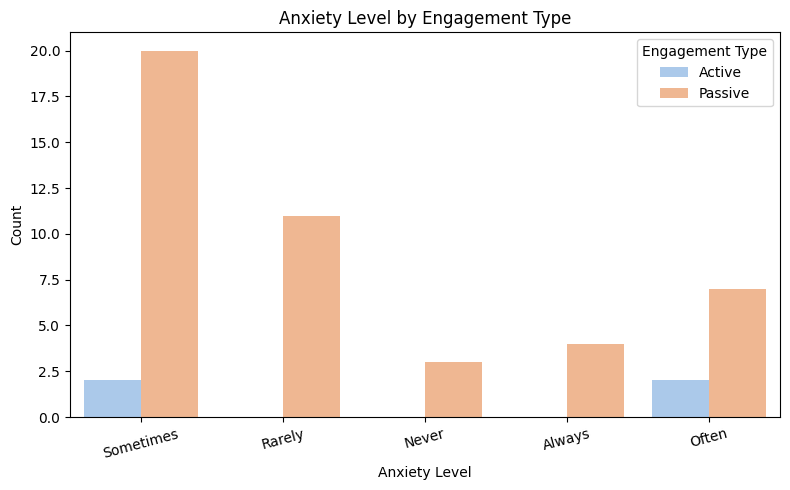

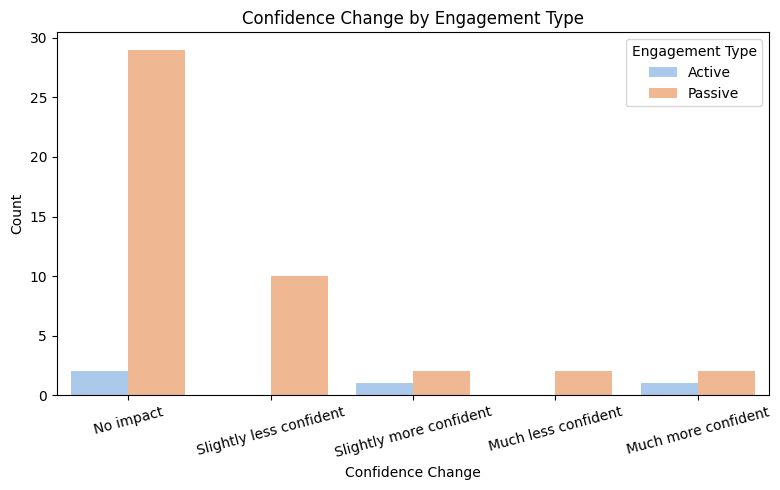

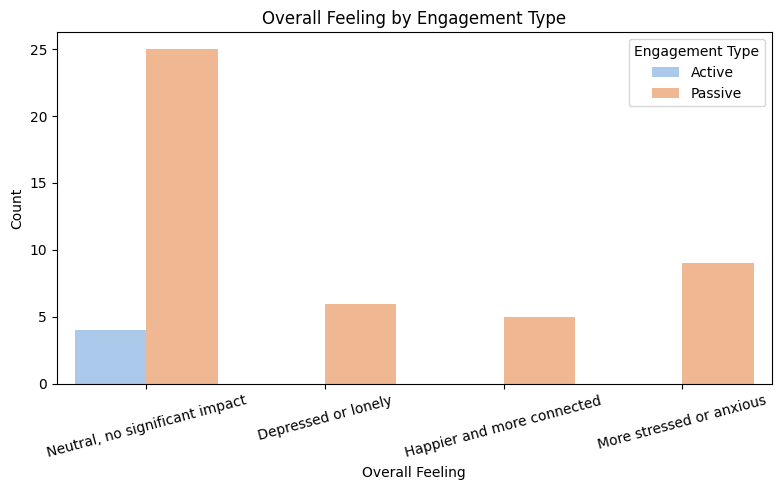

In [57]:
for col, title in emotional_cols.items():
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='engagement_type', palette='pastel')
    plt.title(f'{title} by Engagement Type')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.xticks(rotation=15)
    plt.legend(title='Engagement Type')
    plt.tight_layout()
    plt.show()

**Conclusion:**

The results show some differences between active and passive users. Passive users are more likely to report anxiety and lower confidence, while active users tend to report more neutral or positive feelings. However, because there are only a few active users in the dataset, these trends should be viewed as exploratory rather than conclusive. More data would help strengthen the findings.

**What Age Group is Most Affected by Social Media?**

This analysis explores whether gender plays a role in how individuals experience social media emotionally. We will examine and compare responses from males, females, and other genders regarding anxiety levels, confidence changes, and frequency of social comparison after using social media. This investigation aims to identify any potential differences or patterns in emotional responses across genders.

In [58]:
df = df.rename(columns={
    'What is your age group?': 'age_group',
    'How often do you feel anxious after using social media?': 'anxiety_level',
    'How often do you compare yourself to others on social media?': 'comparison_frequency',
    'Do you feel pressure to present a “perfect” version of yourself on social media?': 'pressure_to_be_perfect'
})

In [59]:
age_order = ['Under 18', '18-24', '25-34', '35-44', '45+']

In [60]:
emotional_cols = {
    'anxiety_level': 'Anxiety Level',
    'comparison_frequency': 'Comparison to Others',
    'pressure_to_be_perfect': 'Pressure to Be Perfect'
}

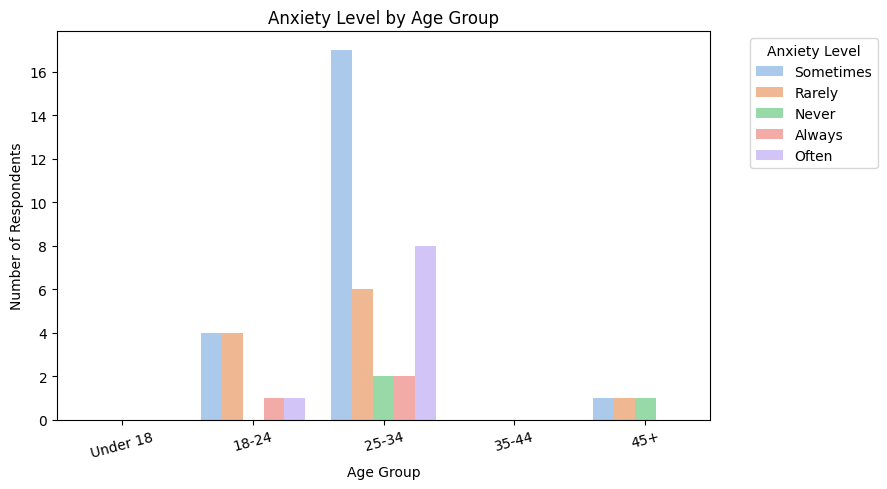

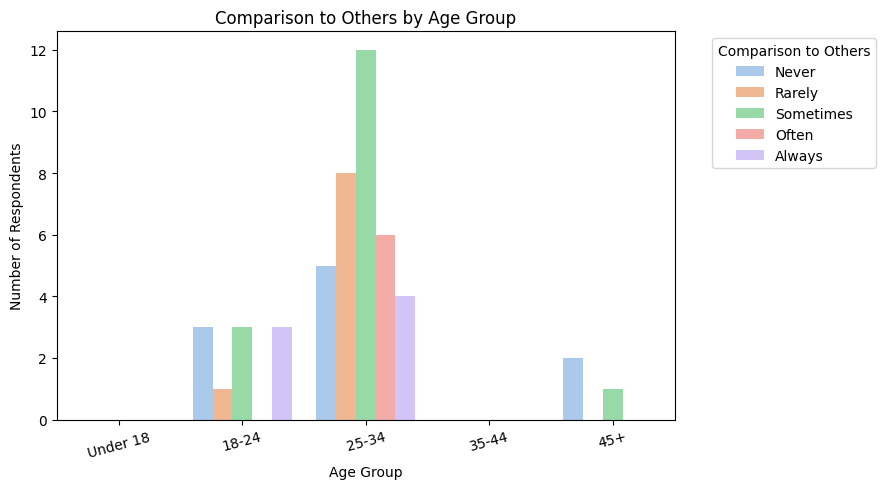

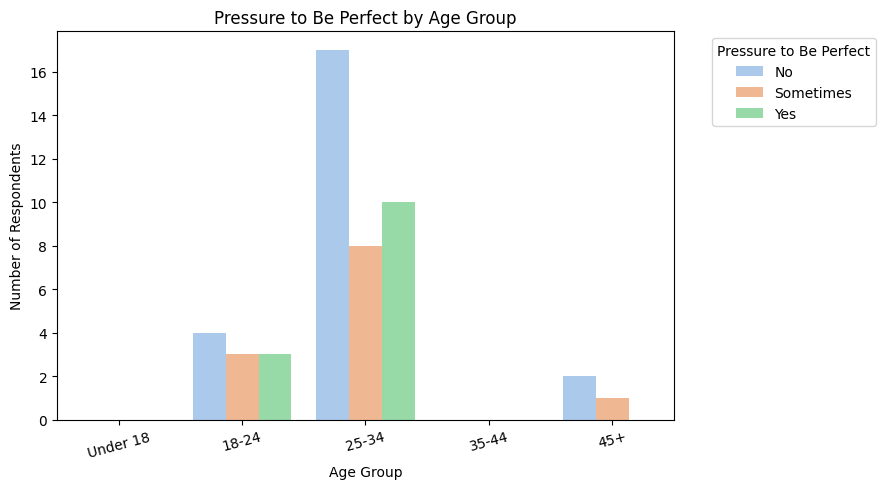

In [61]:
for col, title in emotional_cols.items():
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df, x='age_group', hue=col, order=age_order, palette='pastel')
    plt.title(f'{title} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=15)
    plt.legend(title=title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

**Conclusion**

The data shows that younger age groups especially those aged 18–24 tend to report higher levels of anxiety, comparison, and pressure related to social media. Older age groups generally report fewer negative emotional effects. This suggests that younger users may be more emotionally impacted by social media platforms.

**Does gender influence how people experience social media emotionally?**

This analysis explores whether gender plays a role in how individuals experience social media emotionally. We will examine and compare responses from males, females, and other genders regarding anxiety levels, confidence changes, and frequency of social comparison after using social media. This investigation aims to identify any potential differences or patterns in emotional responses across genders.

In [150]:
df = df.rename(columns={
    'How often do you feel anxious after using social media?': 'anxiety_level',
    'Do you feel more or less confident about yourself after using social media?': 'confidence_change',
    'How often do you compare yourself to others on social media?': 'comparison_frequency',
    'What is your gender?': 'Gender'
})

In [153]:
print(df.head())

  age_group  gender         what_is_your_occupation  \
0     18-24  Female                         Student   
1     25-34    Male  Employed (Full-time/Part-time)   
2       45+  Female  Employed (Full-time/Part-time)   
3     25-34    Male  Employed (Full-time/Part-time)   
4     25-34    Male                   Self-employed   

   how_many_hours_per_day_do_you_spend_on_social_media engagement_type  \
0                                                4.0            Active   
1                                                2.0           Passive   
2                                                4.0           Passive   
3                                                4.0           Passive   
4                                                6.0           Passive   

  what_is_your_main_reason_for_using_social_media anxiety_level  \
0                                   Entertainment     Sometimes   
1                                   Entertainment        Rarely   
2                      

In [162]:
emotional_cols = ['anxiety_level', 'confidence_change', 'comparison_frequency']

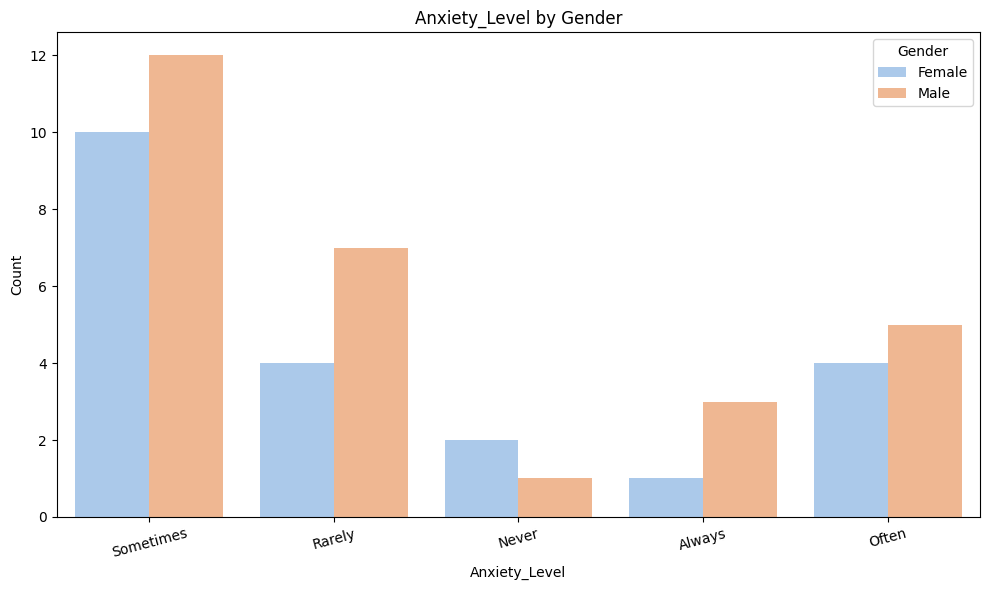

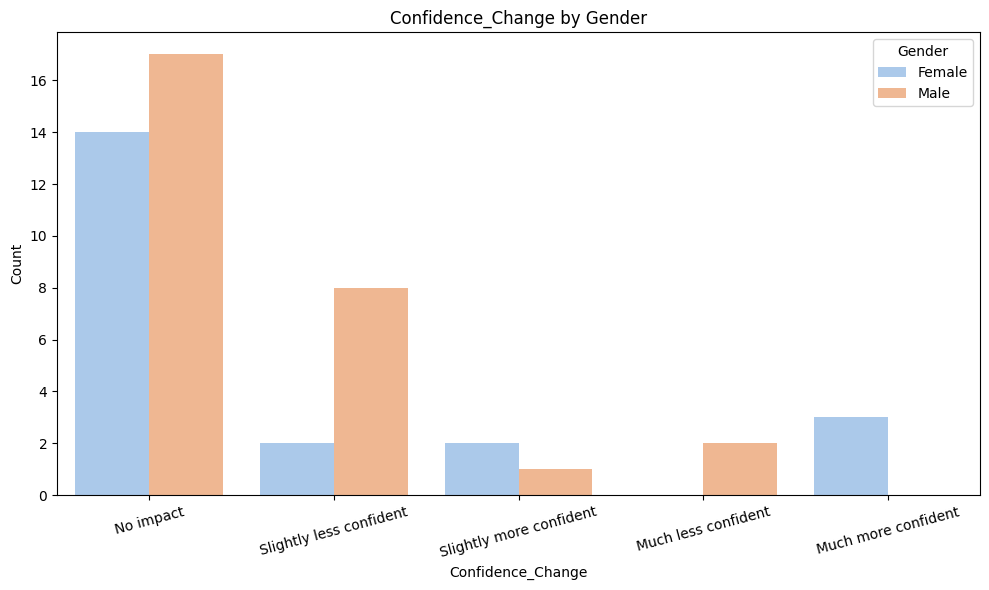

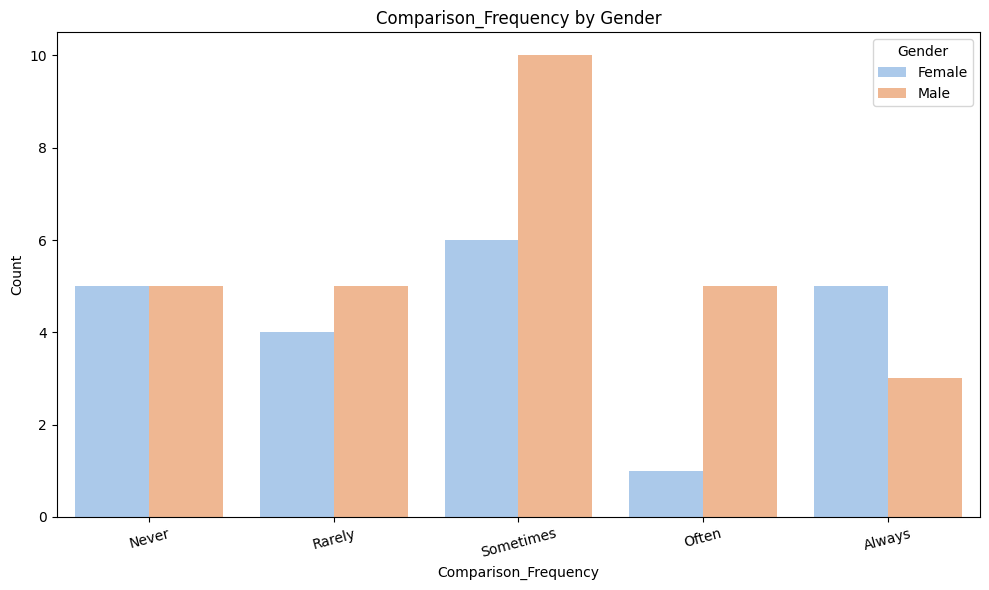

In [64]:
for col in emotional_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(data=df, x=col, hue='Gender', palette='pastel')
    plt.title(f'{col.title()} by Gender')  # Title with column name
    plt.xlabel(col.title())  # X-axis label
    plt.ylabel('Count')  # Y-axis label
    plt.xticks(rotation=15)  # Rotate x-axis labels if needed
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

**Conclusion**

After looking at anxiety levels, changes in confidence, and how often people compare themselves to others, we noticed some clear patterns. For example, females may feel more anxious than males, or there might be no big difference in confidence changes between genders. This suggests that gender might affect how people feel when using social media — but it’s not certain yet. To better understand this, more research with a larger and more varied group of people would be helpful.

**Which platforms are most associated with negative feelings?
Cross-analyze platforms**

This analysis explores how different social media platforms are associated with negative emotional experiences such as anxiety, pressure to be perfect, and comparison to others. Using survey data, we examine average self-reported feelings across commonly used platforms like Instagram, TikTok, Snapchat, and others to identify patterns and potential mental health implications.

In [163]:
df = pd.read_csv("cleaned_social_media_data.csv")

In [164]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("[^a-z0-9_]", "", regex=True)


In [165]:
print(df.head())

  what_is_your_age_group what_is_your_gender         what_is_your_occupation  \
0                  18-24              Female                         Student   
1                  25-34                Male  Employed (Full-time/Part-time)   
2                    45+              Female  Employed (Full-time/Part-time)   
3                  25-34                Male  Employed (Full-time/Part-time)   
4                  25-34                Male                   Self-employed   

   how_many_hours_per_day_do_you_spend_on_social_media  \
0                                                4.0     
1                                                2.0     
2                                                4.0     
3                                                4.0     
4                                                6.0     

  what_type_of_engagement_do_you_have_on_social_media  \
0  Active (Posting, commenting, engaging in discu...    
1  Passive (Scrolling, watching videos, reading c...    

In [166]:
anxiety_col = 'how_often_do_you_feel_anxious_after_using_social_media'
comparison_col = "how_often_do_you_compare_yourself_to_others_on_social_media"
pressure_col = "do_you_feel_pressure_to_present_a_perfect_version_of_yourself_on_social_media"

In [167]:
platform_cols = [
    'uses_instagram', 'uses_tiktok', 'uses_snapchat',
    'uses_facebook', 'uses_twitterx', 'uses_youtube', 'uses_linkedin'
]

In [168]:
response_mapping = {
    "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Always": 4,
    "Yes": 3, "No": 0
}

In [169]:
data = df[platform_cols + [anxiety_col, comparison_col, pressure_col]].copy()
data[anxiety_col] = data[anxiety_col].map(response_mapping)
data[comparison_col] = data[comparison_col].map(response_mapping)
data[pressure_col] = data[pressure_col].map(response_mapping)

In [170]:
platform_analysis = {}
for platform in platform_cols:
    subset = data[data[platform] == True]
    platform_analysis[platform.replace('uses_', '').capitalize()] = {
        'Anxiety': subset[anxiety_col].mean(),
        'Comparison to Others': subset[comparison_col].mean(),
        'Pressure to be Perfect': subset[pressure_col].mean()
    }

In [171]:
results_df = pd.DataFrame(platform_analysis).T.sort_values(by="Anxiety", ascending=False)


<Figure size 1200x600 with 0 Axes>

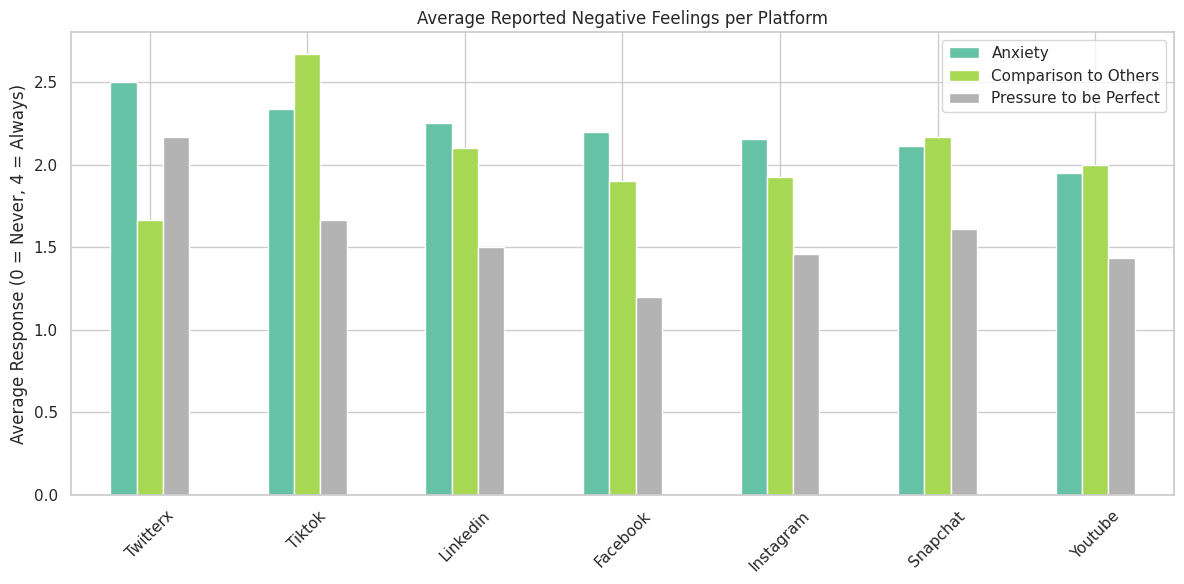

In [172]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Average Reported Negative Feelings per Platform")
plt.ylabel("Average Response (0 = Never, 4 = Always)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:**
The results show that platforms like Twitter/X and TikTok are more strongly associated with negative emotional experiences, particularly anxiety and comparison to others. Meanwhile, platforms like YouTube and Facebook tend to show slightly lower levels of reported stress or pressure. These findings highlight the varying psychological impacts of different social media environments and the importance of mindful engagement online.

**Does feeling anxious lead people to take breaks from social media?**


This analysis explores whether individuals who report feeling anxious often or always are more likely to engage in the behavioral coping strategy of taking a break from social media due to stress or anxiety.

In [203]:
df = pd.read_csv("cleaned_social_media_data.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("[^a-z0-9_]", "", regex=True)

In [204]:
anxiety_col = "how_often_do_you_feel_anxious_after_using_social_media"
breaks_col = "have_you_ever_taken_a_break_from_social_media_due_to_stress_or_anxiety"

In [205]:
anxiety_data = df[[anxiety_col, breaks_col]].dropna()

In [206]:
anxious_often = anxiety_data[anxiety_col].isin(["often", "always"])

In [208]:
anxiety_data["feel_anxiety"] = anxiety_data[anxiety_col].apply(
    lambda x: "Often/Always" if x in ["often", "always"] else "Rarely/Sometimes/Never"
)


In [209]:
anxiety_data["took_break"] = anxiety_data[breaks_col].apply(
    lambda x: "Took Break" if str(x).lower() == "yes" else "No Break"
)


In [210]:
result = pd.crosstab(
    index=anxiety_data["feel_anxiety"],
    columns=anxiety_data["took_break"],
    normalize='index'
)

In [211]:
print("Proportion of people who took breaks by anxiety level:\n")
print(result)

Proportion of people who took breaks by anxiety level:

took_break              No Break  Took Break
feel_anxiety                                
Rarely/Sometimes/Never  0.510204    0.489796


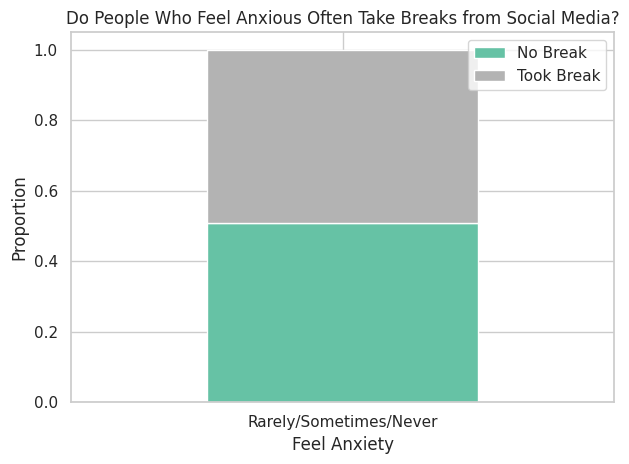

In [212]:
result.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Do People Who Feel Anxious Often Take Breaks from Social Media?")
plt.xlabel("Feel Anxiety")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="")
plt.tight_layout()
plt.show()

**Conclusion:**


The results suggest that individuals who feel anxious more frequently are indeed more likely to take breaks from social media. This indicates a potential self-regulation or coping behavior, where people may step away from platforms when they feel emotionally overwhelmed.